In [1]:
import pandas as pd 
import re 
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer

##  Reading the raw text data

In [2]:
news= open('en_US/en_US.news.txt',encoding="utf8").read()
blogs= open('en_US/en_US.blogs.txt',encoding="utf8").read()
twitter= open('en_US/en_US.twitter.txt',encoding="utf8").read()

In [3]:
print(len(news))
print(len(blogs))
print(len(twitter))

204233401
207723793
164456396


- Merging the news and blog data 
- Keeping the twitter data separate

In [4]:
text_corpus1=news+blogs 
print(len(text_corpus1))

411957194


## Cleaning

- Removing Extra space
- Removing Special Characters
- Tokenizing text data
- Tokenizing Twitter data

In [6]:
def extra_space(text):
    new_text= re.sub("\s+"," ",text)
    return new_text
def sp_charac(text):
    new_text=re.sub("[^0-9A-Za-z ]", "" , text)
    return new_text
def tokenize_text(text):
    new_text=word_tokenize(text)
    return new_text
def tokenize_twitter(text):
    tweet = TweetTokenizer()
    new_text=tweet.tokenize(text)
    return new_text


In [7]:
cleaned_text=extra_space(text_corpus1)
cleaned_twitter=extra_space(twitter)
print("Removed Extra Spaces")
cleaned_text=sp_charac(cleaned_text)
cleaned_twitter=sp_charac(cleaned_twitter)
print("Removed Special Caracters")
cleaned_text=tokenize_text(cleaned_text)
cleaned_twitter=tokenize_twitter(cleaned_twitter)
print("Tokenized data")

Removed Extra Spaces
Removed Special Caracters
Tokenized data


In [16]:
# Storing them in separate text files
import pickle
with open("cleaned_text.txt", "wb") as fp:   #Pickling
    pickle.dump(cleaned_text, fp)
with open("cleaned_twitter.txt", "wb") as fp:   #Pickling
    pickle.dump(cleaned_twitter, fp)

In [1]:
import pickle
with open("cleaned_text.txt", "rb") as fp:   # Unpickling
    cleaned_text = pickle.load(fp)
with open("cleaned_twitter.txt", "rb") as fp:   # Unpickling
    cleaned_twitter = pickle.load(fp)

After tokenizing twitter data separately ,  I have got the full tokenized corpus.

In [2]:
cleaned_corpus=cleaned_text+cleaned_twitter
print(len(cleaned_corpus))

101098262


In [7]:
print(cleaned_corpus[:50])
print(cleaned_twitter[:50])

['He', 'wasnt', 'home', 'alone', 'apparently', 'The', 'St', 'Louis', 'plant', 'had', 'to', 'close', 'It', 'would', 'die', 'of', 'old', 'age', 'Workers', 'had', 'been', 'making', 'cars', 'there', 'since', 'the', 'onset', 'of', 'mass', 'automotive', 'production', 'in', 'the', '1920s', 'WSUs', 'plans', 'quickly', 'became', 'a', 'hot', 'topic', 'on', 'local', 'online', 'sites', 'Though', 'most', 'people', 'applauded', 'plans']
['How', 'are', 'you', 'Btw', 'thanks', 'for', 'the', 'RT', 'You', 'gonna', 'be', 'in', 'DC', 'anytime', 'soon', 'Love', 'to', 'see', 'you', 'Been', 'way', 'way', 'too', 'long', 'When', 'you', 'meet', 'someone', 'special', 'youll', 'know', 'Your', 'heart', 'will', 'beat', 'more', 'rapidly', 'and', 'youll', 'smile', 'for', 'no', 'reason', 'theyve', 'decided', 'its', 'more', 'fun', 'if', 'I']


#### Creating dictionary of unigrams with stopwords

In [3]:
word_count={}
for word in cleaned_corpus:
    if word not in word_count:
        word_count[word]=0
    word_count[word]+=1


In [5]:
import numpy as np
np.save('unigram_dict.npy', word_count) 

In [27]:
freq_df  = pd.DataFrame.from_dict(word_count,orient='index',columns=['Count'])
freq_df=freq_df.sort_values(by=['Count'],ascending=False)
freq_df.head()

,Count
the,4222789
to,2713212
and,2280707
a,2265544
of,1985512


#### Creating dictionary of unigrams without stopwords

In [10]:
from wordcloud import WordCloud, STOPWORDS
counter={}
for i in word_count.keys():
    if i not in list(STOPWORDS):
        counter[i]=word_count[i]
print(len(counter.keys()))

1193927


There are a total of 1193927 unique words in the corpus excluding stopwords.

## Visualization

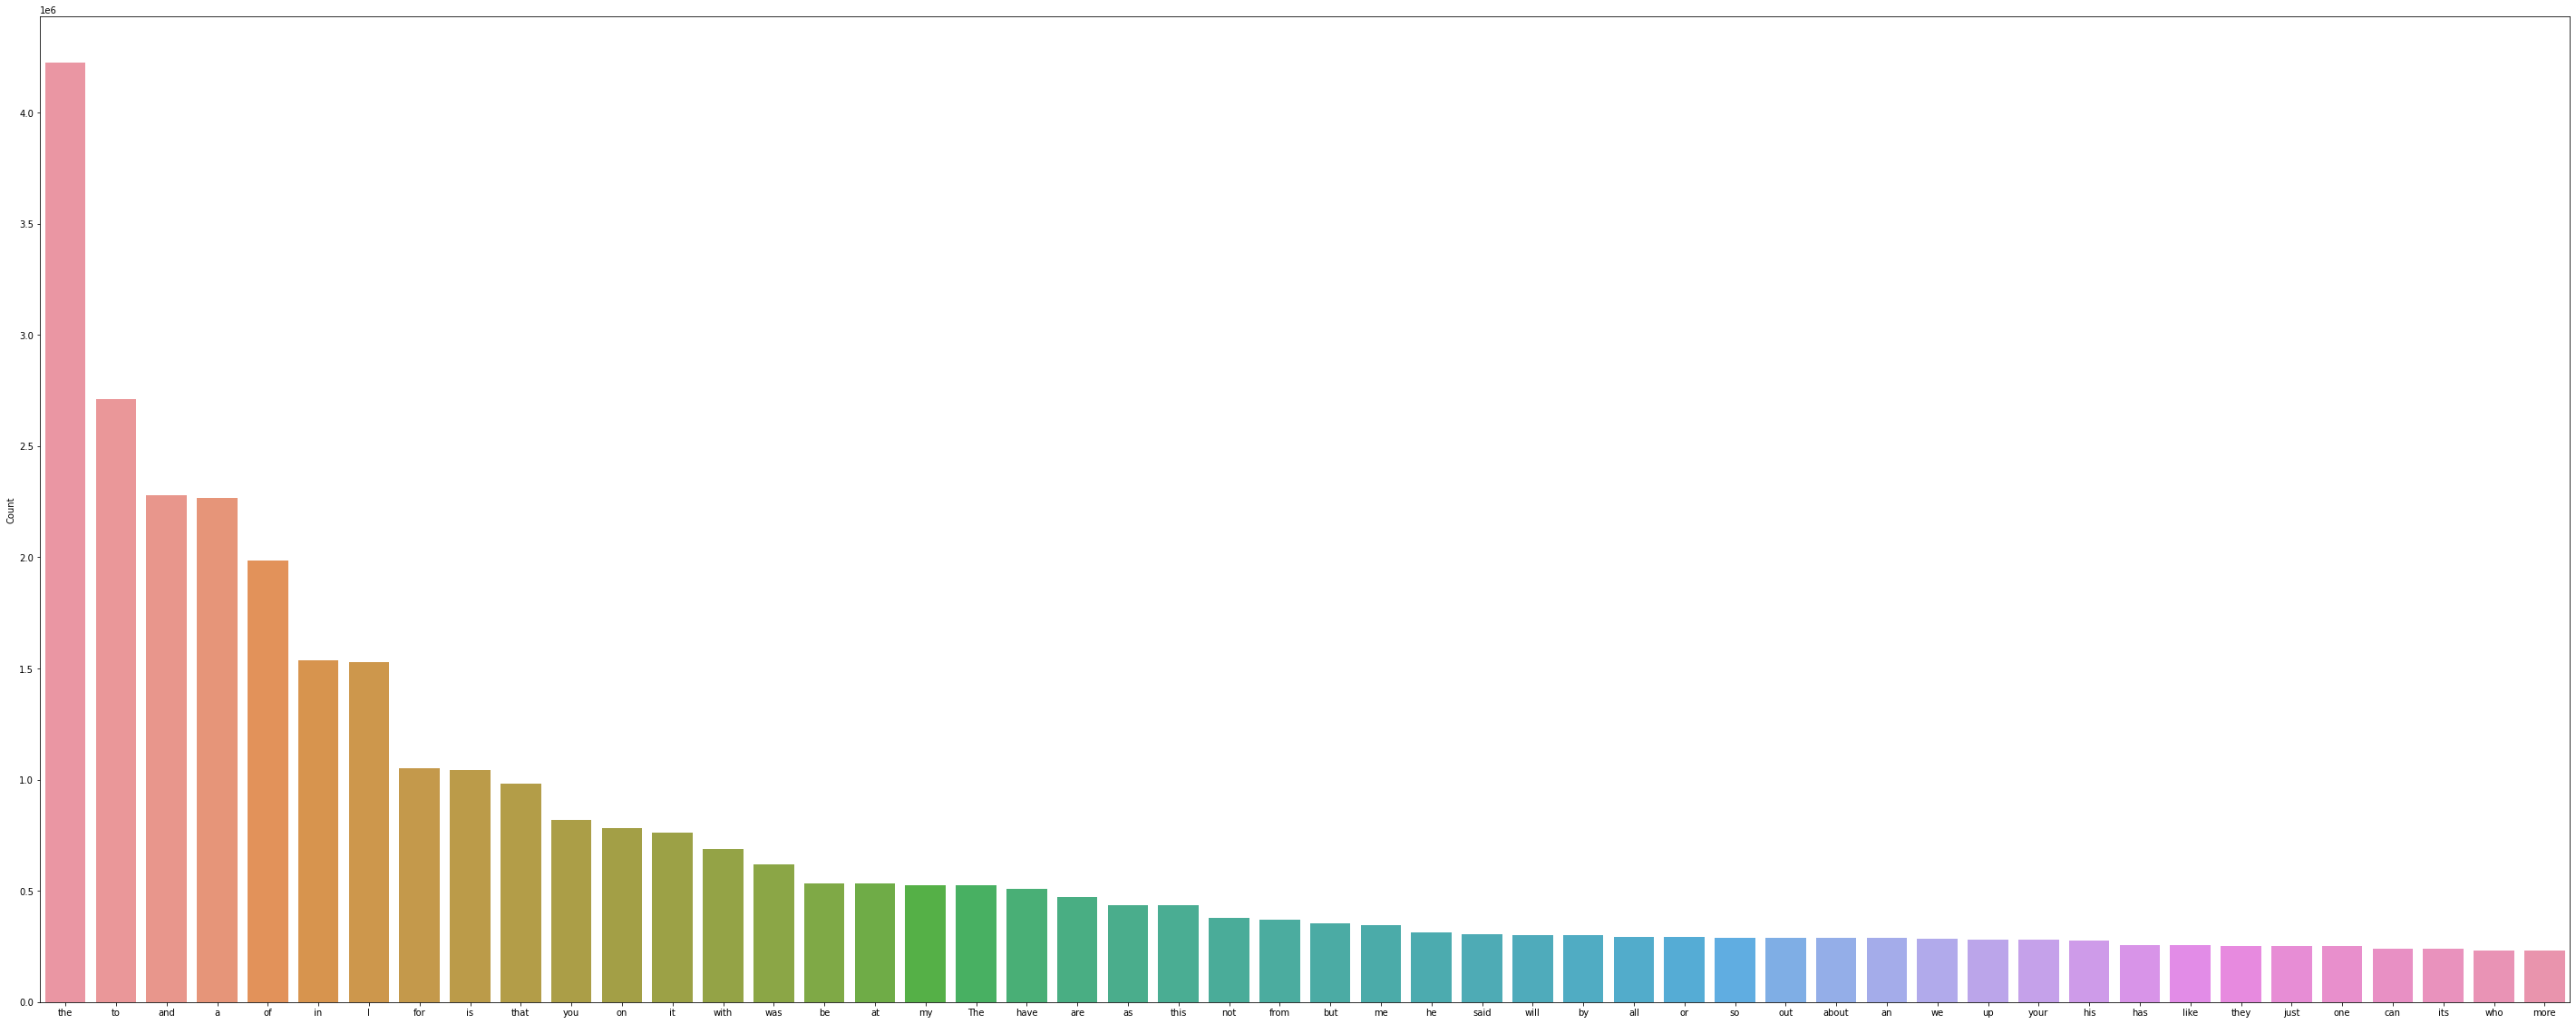

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(50,20))
sns.barplot(freq_df.head(50).index,freq_df.head(50)['Count'])
plt.xlabel("Top 50 words")
plt.ylabel("Frequency")
plt.show()


- Visualising the top 50 words based on their frequency of occurrence
- Most of them are stopwords as they are used frequently .


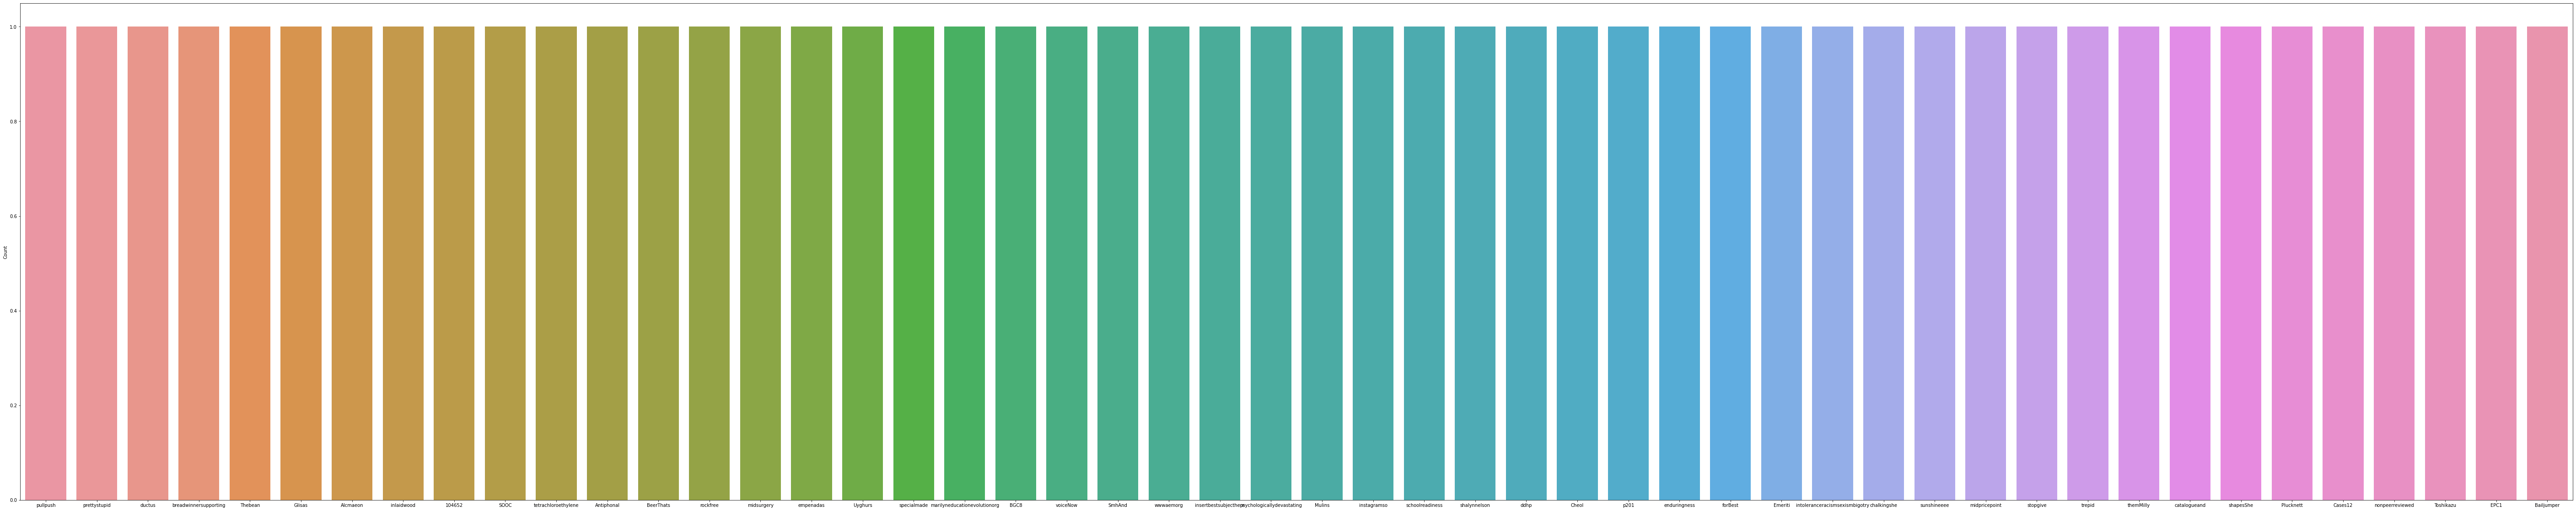

In [37]:
plt.figure(figsize=(100,20))
sns.barplot(freq_df.tail(50).index,freq_df.tail(50)['Count'])
plt.xlabel("Last 50 words")
plt.ylabel("Frequency")
plt.show()

- Visualizing the last 50 words based on their frequency
- All of them occur once in the entire corpus

### WORD CLOUDS

#### UNIGRAM WORDCLOUD

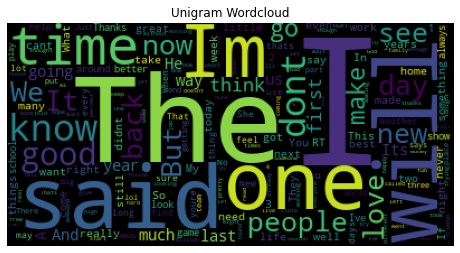

In [29]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud( background_color="black").generate_from_frequencies(counter)
plt.figure(figsize=(8, 5))
plt.axis("off")
plt.title("Unigram Wordcloud")
plt.imshow(wordcloud)
    

- Generated the word cloud with unigram words .
- There are no stopwords here as I am trying to visualize most commonly used non-stopwords.

In [6]:
del word_count

#### BIGRAM WORDCLOUD

In [7]:
# Code Reference https://avidml.wordpress.com/2017/08/03/word-cloud-with-frequently-occurring-bigrams-and-salient-bigrams/

from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
finder = BigramCollocationFinder.from_words(cleaned_corpus)
bigram_measures = BigramAssocMeasures()
scored = finder.score_ngrams(bigram_measures.raw_freq)


In [8]:
#joining the two words with an _
bigram_dict={}
for i in range(len(scored)):
    bigram_dict['_'.join(scored[i][0])] = scored[i][1]

In [9]:
np.save('bigram_dict.npy', bigram_dict)

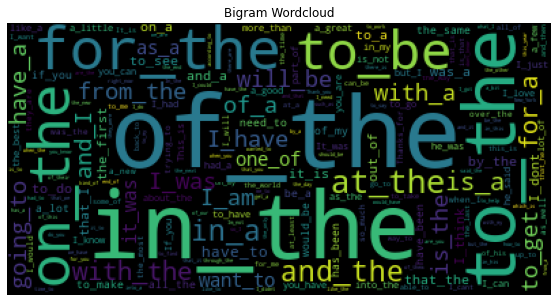

In [20]:
import matplotlib.pyplot as plt
wordcloud = WordCloud( background_color="black").generate_from_frequencies(bigram_dict)
plt.figure(figsize=(10, 5))
plt.axis("off")
plt.title("Bigram Wordcloud")
plt.imshow(wordcloud)
plt.show()

- Here I have included the stopwords otherwose the meaning of the phrases will change.
- There is a lost of preposition use as observed from the word cloud

In [10]:
del bigram_dict

#### TRIGRAM WORDCLOUD

In [11]:
data=" ".join(cleaned_corpus[:100000])


In [12]:

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(3,3),stop_words=None)
X = vectorizer.fit_transform([data])
vocab = vectorizer.vocabulary_
print("Vectorized the data : ")
count_values = X.toarray().sum(axis=0)
print("Creating Trigram Dictionary")
trigram_dict={}
for ng_count, ng_text in sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True):
    trigram_dict[ng_text]=ng_count

Vectorized the data : 
Creating Trigram Dictionary


In [13]:

np.save('trigram_dict.npy', trigram_dict) 

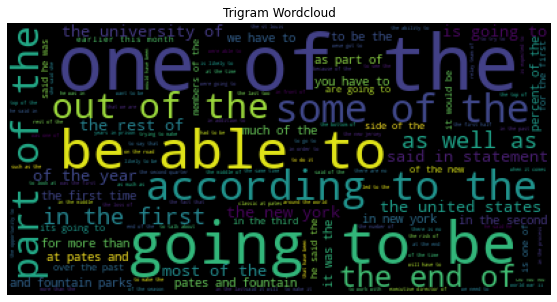

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud( background_color="black").generate_from_frequencies(trigram_dict)
plt.figure(figsize=(10, 5))
plt.axis("off")
plt.title("Trigram Wordcloud")
plt.imshow(wordcloud)
plt.show()

####  Most commonly used phrases 
- 'one of the'
- 'out of the'
- 'be able to'
- 'some of the' 
- 'going to be'


In [14]:

del trigram_dict

#### QUADGRAM WORDCLOUD

In [15]:
quad_data=" ".join(cleaned_corpus[:1000000])


In [16]:
vectorizer = CountVectorizer(ngram_range=(4,4),stop_words=None)
X = vectorizer.fit_transform([quad_data])
vocab = vectorizer.vocabulary_
print("Vectorized the data : ")
count_values = X.toarray().sum(axis=0)
print("Creating Quadgram Dictionary")
quadgram_dict={}
for ng_count, ng_text in sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True):
    quadgram_dict[ng_text]=ng_count

Vectorized the data : 
Creating Quadgram Dictionary


In [17]:
np.save('quadgram_dict.npy', quadgram_dict) 

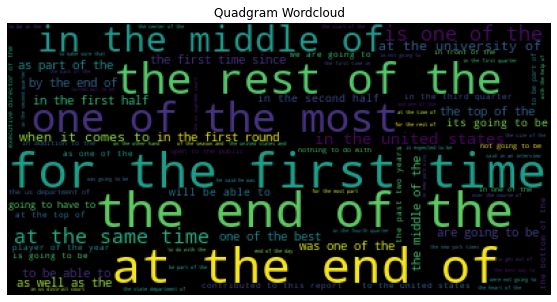

In [30]:
wordcloud = WordCloud( background_color="black").generate_from_frequencies(quadgram_dict)
plt.figure(figsize=(10, 5))
plt.axis("off")
plt.title("Quadgram Wordcloud")
plt.imshow(wordcloud)
plt.show()

#### Most commonly used phrases 
- 'in the middle of'
- 'one of the most'
- 'the rest of the'
- 'in the middle of'
#### In most of the cases , there is large use of stopwords.

In [18]:
# As these dictionaries take up a huge space , so I have deleted them
del quadgram_dict